## Get all Imports

In [3]:
from torchvision.datasets import MNIST
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Download and save the MNIST dataset

In [4]:
mnist_data_train = MNIST('/', train=True, download=True)
mnist_data_test = MNIST('/', train=False, download=True)

100%|██████████| 9912422/9912422 [00:02<00:00, 4343839.30it/s]


Extracting /MNIST\raw\train-images-idx3-ubyte.gz to /MNIST\raw



100%|██████████| 28881/28881 [00:01<00:00, 24240.68it/s]


Extracting /MNIST\raw\train-labels-idx1-ubyte.gz to /MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 11154789.48it/s]


Extracting /MNIST\raw\t10k-images-idx3-ubyte.gz to /MNIST\raw



100%|██████████| 4542/4542 [00:01<00:00, 2590.25it/s]

Extracting /MNIST\raw\t10k-labels-idx1-ubyte.gz to /MNIST\raw



## Load the data and perform pre-processing

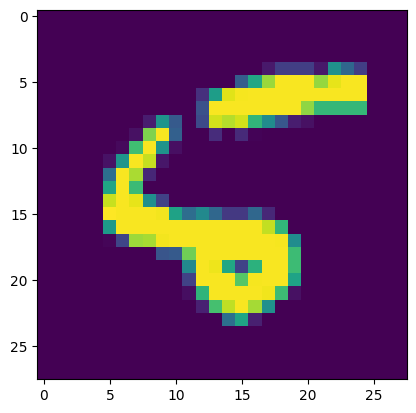

In [5]:
# Putting data into correct variables
X_train, Y_train = mnist_data_train.data, mnist_data_train.targets
X_test, Y_test = mnist_data_test.data, mnist_data_test.targets

index = np.where(Y_test==5)[0][0]
plt.imshow(X_test[index])

# Flatten the images into vectors
X_train, X_test = np.reshape(X_train, (X_train.shape[0], 28*28)), np.reshape(X_test, (X_test.shape[0], 28*28))

# Select two classes (1 -> +1) and (7 -> -1). This is for train set
sample_indices_pos = np.where(Y_train == 8)[0]
sample_indices_neg = np.where(Y_train != 8)[0]
X1, X2 = X_train[sample_indices_pos], X_train[sample_indices_neg[:len(sample_indices_pos)]]
# Y1, Y2 = Y_train[sample_indices_pos], np.asarray([-1 for i in range(len(sample_indices_neg))])
Y1, Y2 = np.ones(len(sample_indices_pos)), np.ones(len(sample_indices_pos))*-1
# Create one train dataset out of this
X_train, Y_train = np.concatenate((X1, X2), axis=0), np.concatenate([Y1, Y2])

# Select two classes (1 -> +1) and (7 -> -1). This is for test set
sample_indices_pos = np.where(Y_test == 8)[0]
sample_indices_neg = np.where(Y_test != 8)[0]
X1, X2 = X_test[sample_indices_pos], X_test[sample_indices_neg[:len(sample_indices_pos)]]
# Y1, Y2 = Y_test[sample_indices_pos], np.asarray([-1 for i in range(len(sample_indices_neg))])
Y1, Y2 = np.ones(len(sample_indices_pos)), np.ones(len(sample_indices_pos))*-1
# Create one train dataset out of this
X_test, Y_test = np.concatenate((X1, X2), axis=0), np.concatenate([Y1, Y2])

# Whiten the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train.shape

(11702, 784)

In [7]:
Y_test[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Now Apply Linear Regression based Classification

In [8]:
model = LinearRegression()
model.fit(X_train, Y_train)
preds = model.predict(X_test)

## Check out the confusion matrix

Accuracy: 0.9019507186858317 




Text(0.5, 1.0, 'Confusion Matrix')

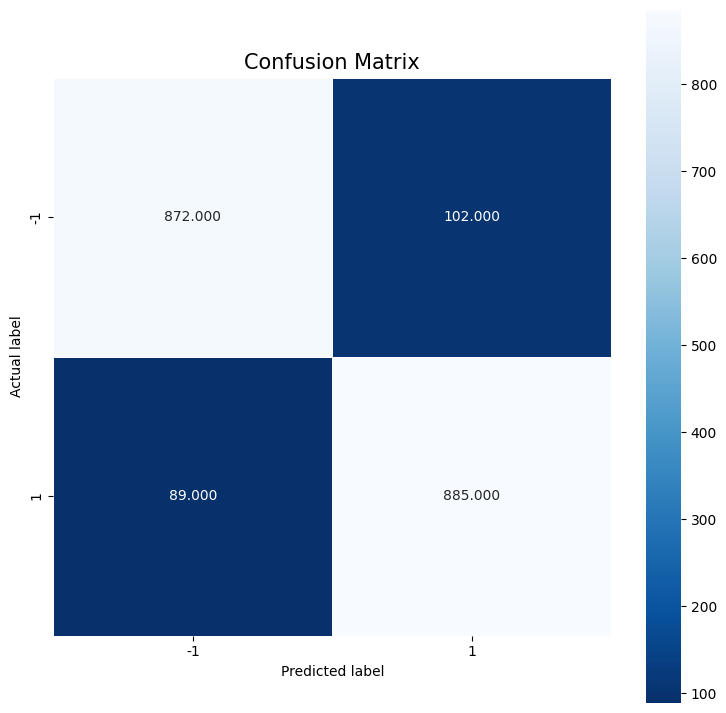

In [9]:
# The outputs are continuous. Apply thresholding to calculate accuracy
preds = np.asarray([1 if i>0 else -1 for i in preds])
print("Accuracy:", accuracy_score(Y_test, preds), "\n\n")

cm = confusion_matrix(Y_test, preds)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r', xticklabels=[-1, 1], yticklabels=[-1, 1]);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Confusion Matrix", size = 15)

## Images correctly classified (True Positive)

<Figure size 640x480 with 0 Axes>

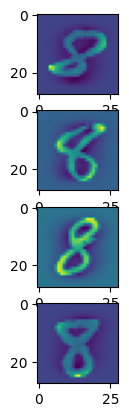

In [10]:
plt.figure()
f, axarr = plt.subplots(4,1)
indices = np.where((preds==1) & (Y_test==1))[0][:4]
for idx, index in enumerate(indices):
    axarr[idx].imshow(np.reshape(X_test[index], (28, 28)))

## Images correctly classified (True Negatives)

<Figure size 640x480 with 0 Axes>

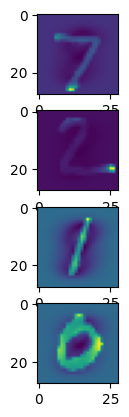

In [11]:
plt.figure()
f, axarr = plt.subplots(4,1)
indices = np.where((preds==-1) & (Y_test==-1))[0][:4]
for idx, index in enumerate(indices):
    axarr[idx].imshow(np.reshape(X_test[index], (28, 28)))

## Images incorrectly classified (False Positives)

<Figure size 640x480 with 0 Axes>

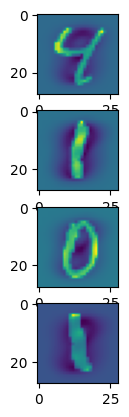

In [12]:
plt.figure()
f, axarr = plt.subplots(4,1)
indices = np.where((preds==1) & (Y_test==-1))[0][:4]
for idx, index in enumerate(indices):
    axarr[idx].imshow(np.reshape(X_test[index], (28, 28)))

## Images incorrectly classified (False Negatives)

<Figure size 640x480 with 0 Axes>

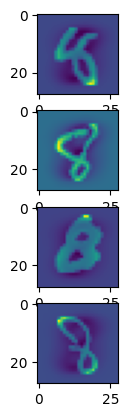

In [13]:
plt.figure()
f, axarr = plt.subplots(4,1)
indices = np.where((preds==-1) & (Y_test==1))[0][:4]
for idx, index in enumerate(indices):
    axarr[idx].imshow(np.reshape(X_test[index], (28, 28)))